In [43]:
import os
from seabird.cnv import fCNV
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

# utility functions for dealing with Seabird CTD data 
from Utils import *

# Cruise 2 CTD data Ewaldo
 Data post-processed with binning 0.5m 
 
 Plotting using Kelly's code (adapted from Cesar's)

In [44]:
# stations = ['FIS', 'littlegull', 'race', 'slope', 'station2', 'station6', 'station7', 'station8', 'WF', 'WFLite']

In [45]:
# datapath = 'CNV_test_Ewa/'

# ctdsection = Get_CTD_Section(datapath,stations)

# ctdsection

In [60]:

# profile = fCNV('CNV/FIS.cnv')

profile.attrs # It will return the header, as a dictionary.

#profile.keys() # It will list the available variables.

# ## name 8 = wetStar: Fluorescence, WET Labs WETstar [mg/m^3]

#profile['wetStar'] # If TEMP2 was on the .keys(), this is how you get the data. It will be a masked array.

{'sbe_model': '9',
 'LATITUDE': 41.294666666666664,
 'LONGITUDE': -72.01983333333334,
 'gps_datetime': 'Oct 20 2020  20:21:45',
 'seasave': 'V 7.26.7.107',
 'instrument_type': 'CTD',
 'nquan': '10',
 'nvalues': '4229',
 'start_time': 'Oct 20 2020 20:21:47 [System UTC, header]',
 'bad_flag': '-9.990e-29',
 'file_type': 'ascii',
 'md5': 'dff2a90ef660951ebc585a14acde5735',
 'datetime': datetime.datetime(2020, 10, 20, 20, 21, 47),
 'filename': 'FIS.cnv'}

In [54]:
# directory where .cnv files are saved
datadir = 'CNV_post'

stnCounter=0
stnnames=[]
# loop through all cnv files
for filename in os.listdir(datadir):
    if filename.endswith(".cnv"):
        # keep count of number of files
        stnCounter += 1
        
        # combine path and file name in string
        pathfile = datadir+'/'+filename
        #print(pathfile)
        
        # create a list of station names
        m = filename.index('_')
        stnnames.append(filename[:m])
        print(stnnames)
        
        # use seabird software to read csv file
        cast = fCNV(pathfile)
    
        latitude, longitude    = cast.attributes['LATITUDE'], cast.attributes['LONGITUDE']
    
        pressure    = cast['PRES']
        temperature = cast['TEMP'] 
        salinity    = cast['PSAL']
        #add on by ewaldo
        fluorescence = cast['wetStar']
        
        if stnCounter == 1:
            Ts = pd.Series(data=cast['TEMP'],index=cast['PRES'],name=cast)
            Ss = pd.Series(data=cast['PSAL'],index=cast['PRES'],name=cast)
            pHs = pd.Series(data=cast['ph'],index=cast['PRES'],name=cast)
            fluor = pd.Series(data=cast['wetStar'], index=cast['PRES'], name = cast)
        else:
            Ts = pd.concat([Ts,pd.Series(data=cast['TEMP'],index=cast['PRES'],name=cast)],axis=1)
            Ss = pd.concat([Ss,pd.Series(data=cast['PSAL'],index=cast['PRES'],name=cast)],axis=1)   
            pHs = pd.concat([pHs,pd.Series(data=cast['ph'],index=cast['PRES'],name=cast)],axis=1)
            fluor = pd.concat([fluor, pd.Series(data=cast['wetStar'], index=cast['PRES'], name = cast)], axis = 1)

        lons, lats = [],[]
        
        # Attributes to feed data array
        lons.append(latitude)
        lats.append(longitude)

['slope']
['slope', 'WF']
['slope', 'WF', 'WF Lite']
['slope', 'WF', 'WF Lite', 'station7']
['slope', 'WF', 'WF Lite', 'station7', 'race']
['slope', 'WF', 'WF Lite', 'station7', 'race', 'station6']
['slope', 'WF', 'WF Lite', 'station7', 'race', 'station6', 'station8']
['slope', 'WF', 'WF Lite', 'station7', 'race', 'station6', 'station8', 'littlegull']
['slope', 'WF', 'WF Lite', 'station7', 'race', 'station6', 'station8', 'littlegull', 'FIS']
['slope', 'WF', 'WF Lite', 'station7', 'race', 'station6', 'station8', 'littlegull', 'FIS', 'station2']


In [69]:
fluor

,<seabird.cnv.fCNV object at 0x7fc6e9a32bd0>,<seabird.cnv.fCNV object at 0x7fc6e9a39ed0>,<seabird.cnv.fCNV object at 0x7fc6e9a32a90>,<seabird.cnv.fCNV object at 0x7fc6e84e5c10>,<seabird.cnv.fCNV object at 0x7fc6e9a41e50>,<seabird.cnv.fCNV object at 0x7fc6e9a49e50>,<seabird.cnv.fCNV object at 0x7fc6e9a41ad0>,<seabird.cnv.fCNV object at 0x7fc6d4617d90>,<seabird.cnv.fCNV object at 0x7fc6d461ca90>,<seabird.cnv.fCNV object at 0x7fc6d463add0>
0.213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0896,NaN
1.511,NaN,NaN,NaN,NaN,1.8213,NaN,NaN,NaN,NaN,NaN
1.512,0.8838,NaN,NaN,NaN,NaN,NaN,NaN,1.3056,NaN,NaN
2.015,NaN,NaN,NaN,NaN,NaN,NaN,1.1803,NaN,NaN,NaN
2.016,1.1395,NaN,1.1692,1.2211,1.7011,1.2902,NaN,1.8132,NaN,1.3576
...,...,...,...,...,...,...,...,...,...,...
125.501,0.0777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126.006,0.0778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126.510,0.0707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127.014,0.0759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# Dataframe to DataArray
Txr = Ts.stack().to_xarray().rename({'level_0' : 'pressure', 'level_1' : 'cast'})
Txr.name = 'temperature'
Sxr = Ss.stack().to_xarray().rename({'level_0' : 'pressure', 'level_1' : 'cast'})
Sxr.name = 'salinity'
pHxr = pHs.stack().to_xarray().rename({'level_0' : 'pressure', 'level_1' : 'cast'})
pHxr.name = 'pH'
fluorxr = fluor.stack().to_xarray().rename({'level_0' : 'pressure', 'level_1' : 'cast'})
fluorxr.name = 'fluorescence'

In [65]:
ctdcombined = xr.merge([Txr,Sxr,pHxr,fluorxr])
#ctdcombined

In [66]:
ctdcombined.pressure.attrs['units'] = 'dbar'
ctdcombined.temperature.attrs['units'] = 'degree C'
ctdcombined.salinity.attrs['units'] = 'psu'
ctdcombined.fluorescence.attrs['units'] = 'mg/m^3'

Text(0.5, 1.0, 'Cruise 1 salinity profiles')

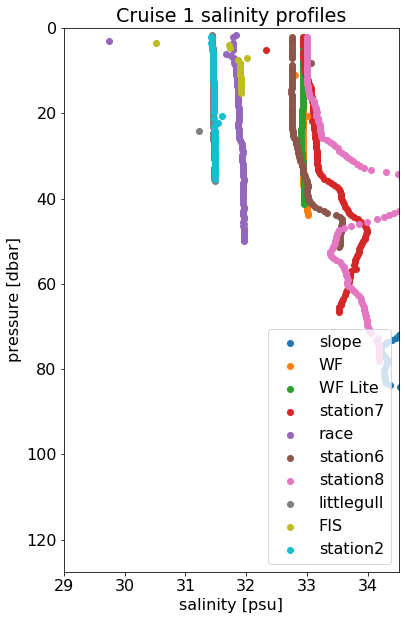

In [52]:

ylim = (ctdcombined.pressure.values.max(),0)
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(6,10))
for i in range(stnCounter):
    ctdcombined.isel(cast=i).plot.scatter('salinity','pressure',label=stnnames[i])
plt.legend(loc=4)
plt.xlim([29, 34.5])
plt.ylim(*ylim)
plt.title("Cruise 1 salinity profiles")

Text(0.5, 1.0, 'Cruise 1 temperature profiles')

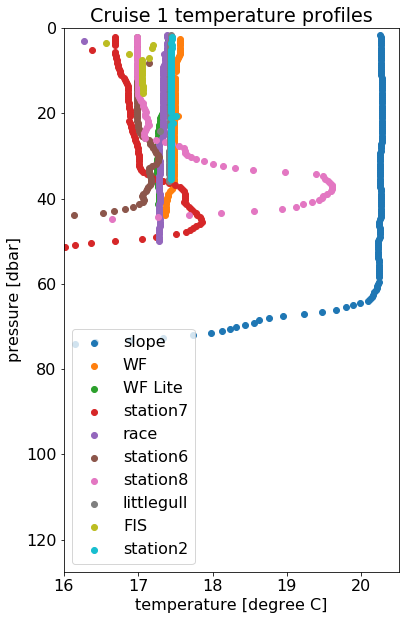

In [53]:
plt.figure(figsize=(6,10))
for i in range(stnCounter):
    ctdcombined.isel(cast=i).plot.scatter('temperature','pressure',label=stnnames[i])
plt.legend(loc=3)
plt.xlim([16, 20.5])
plt.ylim(*ylim)
plt.title("Cruise 1 temperature profiles")

Text(0.5, 1.0, 'Cruise 2 Fluorescence profiles')

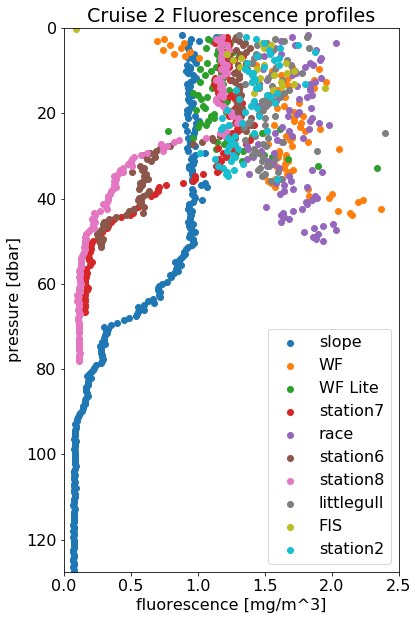

In [75]:
plt.figure(figsize=(6,10))
for i in range(stnCounter):
    ctdcombined.isel(cast=i).plot.scatter('fluorescence','pressure',label=stnnames[i])
plt.legend(loc=4)
plt.xlim([0, 2.5])
plt.ylim(*ylim)
plt.title("Cruise 2 Fluorescence profiles")

Text(0.5, 1.0, 'Cruise 2 Fluorescence profiles')

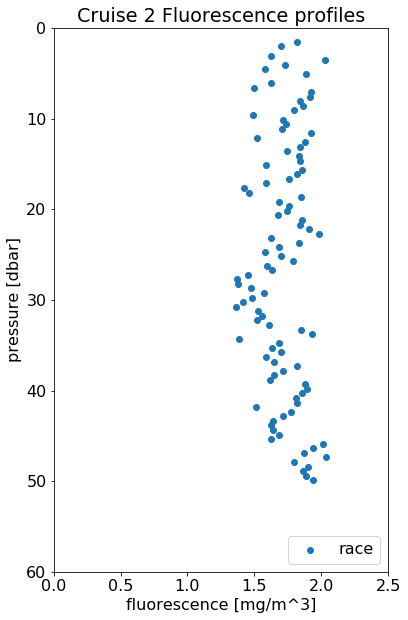

In [83]:
plt.figure(figsize=(6,10))

ctdcombined.isel(cast=4).plot.scatter('fluorescence','pressure',label=stnnames[4])
plt.legend(loc=4)
plt.xlim([0, 2.5])
plt.ylim(*[60, 0])
plt.title("Cruise 2 Fluorescence profiles")